In [2]:
import pandas as pd
import geopandas as gpd
import PIL
import io

In [3]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [5]:
df_confirmed = df_confirmed.groupby('Country/Region').sum()

In [6]:
df_confirmed.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680


In [7]:
df_confirmed = df_confirmed.drop(columns = ['Lat', 'Long'])


In [8]:
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928
Albania,0,0,0,0,0,0,0,0,0,0,...,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752
Algeria,0,0,0,0,0,0,0,0,0,0,...,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399
Andorra,0,0,0,0,0,0,0,0,0,0,...,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995
Angola,0,0,0,0,0,0,0,0,0,0,...,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680


In [9]:
data_transposed  = df_confirmed.T

In [10]:
data_transposed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


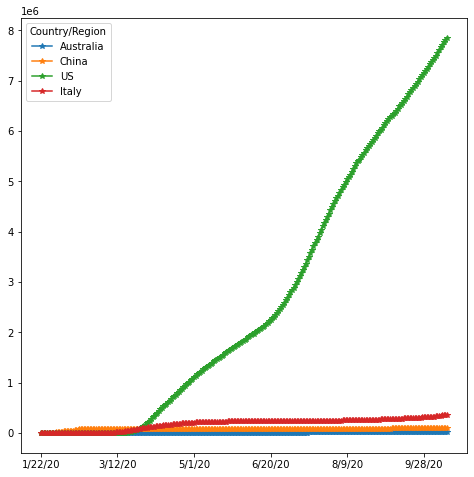

In [11]:
data_transposed.plot(y = ['Australia', 'China', 'US', 'Italy'], use_index = True, figsize = (8,8), marker = '*')

In [27]:
world = gpd.read_file('World_Map.shp')

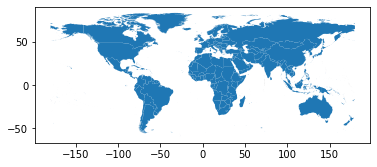

In [28]:
world.plot()

In [29]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [30]:
world.head(20)

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
5,Angola,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
6,American Samoa,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
7,Argentina,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056..."
8,Australia,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967..."
9,Bahrain,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25..."


In [31]:
for index, row in df_confirmed.iterrows():
    if index not in world['NAME'].to_list():
        print(index + ": is not in the list")
    else:
        pass

Brunei: is not in the list
Cabo Verde: is not in the list
Congo (Brazzaville): is not in the list
Congo (Kinshasa): is not in the list
Czechia: is not in the list
Diamond Princess: is not in the list
Eswatini: is not in the list
Holy See: is not in the list
Iran: is not in the list
Korea, South: is not in the list
Kosovo: is not in the list
Laos: is not in the list
Libya: is not in the list
MS Zaandam: is not in the list
Moldova: is not in the list
North Macedonia: is not in the list
South Sudan: is not in the list
Syria: is not in the list
Taiwan*: is not in the list
Tanzania: is not in the list
US: is not in the list
Vietnam: is not in the list
West Bank and Gaza: is not in the list


In [32]:
world.replace('Viet Nam', 'Vietnam', inplace = True)
world.replace('Brunei Darussalam', 'Brunei', inplace = True)
world.replace('Cape Verde', 'Cabo Verde', inplace = True)
world.replace('Democratic Republic of the Congo', 'Congo (Kinshasa)', inplace = True)
world.replace('Congo', 'Congo (Brazzaville)', inplace = True)
world.replace('Czech Republic', 'Czechia', inplace = True)
world.replace('Swaziland', 'Eswatini', inplace = True)
world.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world.replace('Korea, Republic of', 'Korea, South', inplace = True)
world.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world.replace('Republic of Moldova', 'Moldova', inplace = True)
world.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world.replace('Syrian Arab Republic', 'Syria', inplace = True)
world.replace('Taiwan', 'Taiwan*', inplace = True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world.replace('United States', 'US', inplace = True)
world.replace('Palestine', 'West Bank and Gaza', inplace = True)

In [34]:
merge = world.join(df_confirmed, on = 'NAME', how = 'right')

In [41]:
len(merge.columns.to_list())

268

In [ ]:
image_frames = []

for dates in merge.columns.to_list()[2:268]:
  
    # Plot 
    ax = merge.plot(column = dates, 
                    cmap = 'OrRd', 
                    figsize = (8,8), 
                    legend = True,
                    scheme = 'user_defined', 
                    classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 10000, 500000]}, 
                    edgecolor = 'black',
                    linewidth = 0.4)
    
    # Add a title to the map 
    ax.set_title('Total Confirmed Coronavirus Cases: '+ dates, fontdict = 
                 {'fontsize':20}, pad = 12.5)
    
    # Removing the axes
    ax.set_axis_off()
    
    # Move the legend 
    ax.get_legend().set_bbox_to_anchor((0.18, 0.6))
    
    img = ax.get_figure()
    
    
    f = io.BytesIO()
    img.savefig(f, format = 'png', bbox_inches = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))


# Create a GIF animation 
image_frames[0].save('Dynamic_COVID-19_Map_all.gif', format = 'GIF',
            append_images = image_frames[1:], 
            save_all = True, duration = 300, 
            loop = 3)

f.close()

/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.fig

/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.fig

/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.fig

/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.fig

/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/atpathak/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.fig